In [1]:
import os
import sys
import networkx as nx
import pandas as pd
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

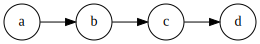

In [17]:
from brent import DAG, Query
from brent.common import make_fake_df

# let's start with a new dataset and visualise it's graph
df = make_fake_df(4)
dag = DAG(df).add_edge("a", "b").add_edge("b", "c").add_edge("c","d")
dag.plot()

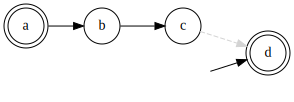

In [19]:
# we can build a query dynamically
q = Query(dag).given(a=1).do(d=1)
q.plot()

In [20]:
# we can also see updated probabilities
q.infer(give_table=True)

,b,a,d,c,prob
6,0,1,1,0,0.266901
7,0,1,1,1,0.286671
14,1,1,1,1,0.202922
15,1,1,1,0,0.243506


In [2]:
aitia = App()

In [23]:
df = aitia.data.hepar2_100_data()
df

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
0,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,-0.904534,1.939563,2.064742,-0.868554,-0.403473,...,-0.531085,1.564697,-0.897166,-0.701810,2.708013,-0.333333,0.0,2.380476,0.0,-0.229416
1,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,1.105542,1.939563,2.064742,-0.868554,-0.403473,...,1.882938,1.564697,0.526907,1.424887,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
2,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,1.105542,-0.515580,-0.484322,1.151339,-0.403473,...,1.882938,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
3,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,-0.904534,-0.515580,-0.484322,-0.868554,-0.403473,...,1.882938,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
4,-0.420084,2.291288,-0.351562,-0.252646,-1.105542,-0.904534,-0.515580,-0.484322,-0.868554,-0.403473,...,-0.531085,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.420084,-0.436436,-0.351562,-0.252646,0.904534,-0.904534,-0.515580,-0.484322,-0.868554,-0.403473,...,-0.531085,-0.639101,-2.321240,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
96,-0.420084,-0.436436,-0.351562,-0.252646,0.904534,-0.904534,1.939563,2.064742,1.151339,-0.403473,...,1.882938,1.564697,0.526907,1.424887,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
97,-0.420084,2.291288,-0.351562,-0.252646,-1.105542,-0.904534,-0.515580,-0.484322,-0.868554,-0.403473,...,-0.531085,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
98,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,1.105542,-0.515580,-0.484322,-0.868554,-0.403473,...,-0.531085,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416


In [24]:
dag_h2 = DAG(df)

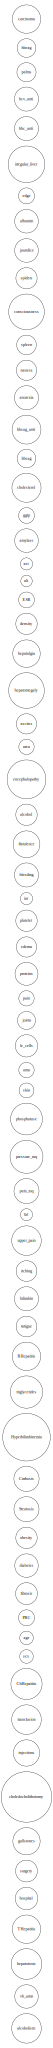

In [25]:
dag_h2.plot()

In [14]:
from brent.sklearn import BrentClassifier
from brent import DAG, Query
dag = DAG(df)
dag.infer()

AttributeError: 'DAG' object has no attribute 'infer'

In [21]:
clf.fit(pd.DataFrame(X, columns=list(df)), y)

ValueError: Shape of passed values is (200, 70), indices imply (200, 71)